<a href="https://colab.research.google.com/github/Ferevr/EjerciciosTAP/blob/master/intro_textos_completo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![figure](figs/logocimat2.png)

<center> Ciencia de Datos<center>

<center> Víctor Muñiz Sánchez <center>
<center> MAEC <center>
<center> Enero a junio 2023 <center>

In [1]:
from google.colab import drive
import os
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
os.chdir("/content/drive/My Drive/EstanciaDelfin/Preprocesado de textos")

In [3]:
!pip install spacy

In [ ]:
!python -m spacy download es_core_news_sm

In [ ]:
!python -m spacy download en_core_web_sm

# Una introducción a procesamiento de textos para machine learning

## Objetivos:

* Mostrar los conceptos básicos de Procesamiento de Lenguaje Natural (NLP) orientado a textos.
* Mostrar repersentaciones vectoriales útiles de textos a partir de modelos probabilísticos de lenguaje y modelos neuronales de lenguaje.
* Abordar modelos de aprendizaje supervisado y no supervisado utilizando métodos de Machine/Deep Learning.
    
    

## Introducción

NLP (Jurafsky & Martin, Speech and Language Processing, 2nd. Ed.
Es un campo de estudio enfocado en la interacción entre __lenguaje humano__ y computadoras. Se encuentra en la intersecciónn de ciencias de la computación, inteligencia artificial y linguistica computacional.
    
El objetivo es que las computadoras, realicen tareas útiles que involucren lenguaje humano, como comunicación máquina-humano, mejorar la comunicación humano-humano o simplemente, realizar procesamiento útil de texto o discurso.

Concepto clave: __lenguaje humano__:
\begin{itemize}
\item Signos linguísticos
\item Signos gráficos (textual)
\item Secuencias sonoras
\item Gestos y señales
\end{itemize}

Nosotros hablaremos sobre textos
<img src="figs/noest3.png" height="35%" width="35%" align="center"/>

__NLP es un área bastante compleja__. Esto se debe principalmente, a que el lenguaje natural es complejo en sí:

\begin{itemize}
\item Altamente ambiguo
\item Utiliza procesos mentales complejos para obtener un significado (uso del entorno)
\item Considera diferentes tipos de "entradas": texto, audio, imágenes, expresiones faciales y corporales, otras representaciones pictóricas 😮 👏 🙌
\item Resultados en tiempo real (machine translation, automatic answering, etc...).
\item En constante evolución
\end{itemize}

Independientemente de la tarea o aplicación, necesitamos una __representación eficiente__ del texto.

*...it is not enough to simply provide a computer with a large amount of data and expect it to learn to speak --the data has to be prepared in such a way that the computer can more easily find patterns and inferences.''*
  
  - James Pustejovsky et al. *Natural Language Annotation.*
  
<img src="figs/anotadores.png" height="35%" width="35%"  align="center"/>

El esquema de Machine Learning

<img src="figs/ML2.png" height="50%" width="50%"/>

Los textos se obtienen de distintas fuentes, tienen diferentes características y su análisis depende en gran parte de tales características.

El procedimiento es como siempre:
\begin{itemize}
\item Obtención del texto
\item Preprocesamiento
\item Representación
\item Modelación
\end{itemize}

En `python` hay varios módulos especializados. Nosotros usaremos varios:
- NLTK
- Scikit Learn
- Keras

## Preprocesamiento

El preproceso y normalización (canonicalización) de texto es una parte muy importante para su posterior modelación y análisis.

Este puede incluir alguno de los siguientes operaciones:

\begin{itemize}
\item Convertir letras a minúsculas o mayúsculas
\item Remover números o convertirlos a palabras
\item Remover signos de puntuación, acentos y otros signos diacríticos
\item Remover caracteres repetidos, incluídos espacios en blanco
\item Remover caracteres con poca frecuencia
\item Remover palabras funcionales o stop words
\item Convertir símbolos a palabras (emojis y otros)
\item Stemming, lematización y POS-tagging
\end{itemize}


Sin embargo, el preproceso y en general, la __extracción__ del texto puede ser mucho más complejo.

Formalidad de la escritura.  The formality continuum (Choudhyrt M. *NLP for social media*)

<img src="figs/formality.png" height="60%" width="60%"  align="center"/>

In [6]:
# revisar las funciones, si tienes dudas, me preguntas...
from my_functions import *

preprocesador = preprocesaTexto(idioma='es', _tokeniza=True, _muestraCambios=False, _quitarAcentos=True,
                                _remueveStop=False, _stemming=False, _lematiza=False, _removerPuntuacion=True)

#txt = 'Sobre la mesa está el sobre'

txt = '¡Hola!, mi nombre es Víctor, vivo en Monterrey, me compre unos 5 pingüinos, ¿Tú quieres uno?.'
txt_prep = preprocesador.preprocesa(txt)
print('Original:\n '+txt)
print('Preprocesado:')
print(txt_prep)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Original:
 ¡Hola!, mi nombre es Víctor, vivo en Monterrey, me compre unos 5 pingüinos, ¿Tú quieres uno?.
Preprocesado:
['hola', 'mi', 'nombre', 'es', 'victor', 'vivo', 'en', 'monterrey', 'me', 'compre', 'unos', 'pingüinos', 'tu', 'quieres', 'uno']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Representaciones de textos

## One-hot encoding

Dado un vocabulario, usamos variables *dummy* para indicar la presencia o ausencia de las palabras del vocabulario en algún documento.

__El orden NO es importante__

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [8]:
corpus = ['El perro se comió mi tarea.', 'Mi vecina se pelea con otra vecina.', 'El gato toca el piano.']

vectorizer = CountVectorizer(lowercase=True, ngram_range= (1,1), binary=True, max_features=10000)
#vectorizer = CountVectorizer(lowercase=True, ngram_range= (2,2), binary=True, max_features=10000)
one_hot_results = vectorizer.fit_transform(corpus)

doc_matrix = pd.DataFrame(one_hot_results.toarray())
doc_matrix.columns = vectorizer.get_feature_names_out()
doc_matrix

,comió,con,el,gato,mi,otra,pelea,perro,piano,se,tarea,toca,vecina
0,1,0,1,0,1,0,0,1,0,1,1,0,0
1,0,1,0,0,1,1,1,0,0,1,0,0,1
2,0,0,1,1,0,0,0,0,1,0,0,1,0


## Vector space model (Salton et al., 1975), también conocido como Bag of Words (BOW, Joachims 1998).

<center>
<img src="figs/bow1.png" height="50%" width="50%"/>
<center>

<center>
<img src="figs/bow2.png" height="50%" width="50%"/>
<center>

<center>
<img src="figs/bow3.png" height="50%" width="50%"/>
<center>

- Un documento es entonces, un punto $d\in \mathbb{R}^{|V|}$, donde $V$ es un vocabulario. Documentos similares tenderán a tener palabras similares, y por lo tanto, vectores parecidos. En nuestro ejemplo, vectores rengl\'on.

- De forma equivalente, una palabra es un punto $w\in \mathbb{R}^{|N|}$, donde $N$ es el número de documentos del corpus. Palabras similares tenderán a ocurrir en documentos similares, entonces tendrán vectores parecidos. En nuestro ejemplo, vectores columna.


In [9]:
vectorizer = CountVectorizer(lowercase=True, ngram_range= (1,1), binary=False, max_features=10000)
#vectorizer = CountVectorizer(lowercase=True, ngram_range= (3,3), binary=False, max_features=10000)
bow = vectorizer.fit_transform(corpus)
bow_df = bow.toarray()
bow_df = pd.DataFrame(bow_df,columns=vectorizer.get_feature_names_out())
bow_df

,comió,con,el,gato,mi,otra,pelea,perro,piano,se,tarea,toca,vecina
0,1,0,1,0,1,0,0,1,0,1,1,0,0
1,0,1,0,0,1,1,1,0,0,1,0,0,2
2,0,0,2,1,0,0,0,0,1,0,0,1,0


## Ejemplo: Análisis de opinión

Textos en español que corresponden a opiniones de usuarios en los siguientes productos: automóviles, hoteles, lavadoras, libros, teléfonos celulares, música, computadoras y películas (Julian Brooke and Maite Taboada. https://www.sfu.ca/~mtaboada/SFU_Review_Corpus.html).

<table align='left'>
<tr>
<td><img src="figs/textos4.png" height="90%" width="90%"/></td>
<td><img src="figs/textos5.png" height="90%" width="90%"/></td>
<td><img src="figs/textos6.png" height="90%" width="90%"/></td>    
</tr>
</table>


In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import my_functions
from my_functions import *

t_data = pd.read_csv('spanish_reviews/reviews_text_caract.csv', header=0)
t_data

,file,categoria,sentimiento
0,coches_no_1_11.txt,coches,no
1,coches_no_1_13.txt,coches,no
2,coches_no_1_15.txt,coches,no
3,coches_no_1_18.txt,coches,no
4,coches_no_1_19.txt,coches,no
...,...,...,...
395,peliculas_yes_5_23.txt,peliculas,yes
396,peliculas_yes_5_4.txt,peliculas,yes
397,peliculas_yes_5_5.txt,peliculas,yes
398,peliculas_yes_5_7.txt,peliculas,yes


In [11]:
dir_data = 'spanish_reviews/all_files/'
# leer y preprocesar textos
preprocesador = preprocesaTexto(idioma='es', _tokeniza=False, _muestraCambios=False, _quitarAcentos=True,
                                _remueveStop=True, _stemming=False)

files_txt = dir_data+t_data['file']
files_txt = files_txt.tolist() #Direcciones de cada uno de los archivos

corpus = []
for f in files_txt:
    file = open(f, 'r', encoding='latin-1')
    txt = file.read()
    txt_prep = preprocesador.preprocesa(txt)
    corpus.append(txt_prep)

y1 = t_data['categoria'].astype('category').cat.codes #??
y2 = t_data['sentimiento'].astype('category').cat.codes

In [12]:
corpus[10]

'hola scenic rx dos años medio km mayoria defectos citan desilusionados entregaron coche fallo turbo creo hicieran revision preentrega si hicieron dio igual darme coche averia sic rotura turbo km pese garantia kilometraje renault hizo cargo solo pague euros infinitos fallos sensor presion neumaticos reconozco chorrada averia obligo llevar coche concesionario menos veces sistema anclaje tapa gasolina motor cierre hechos rompan tiempo solo verlo ultimo famoso sistema escape cambiado veces catalizador dos veces tramo intermedio silencioso final acoples cambios diseño escape servido todas semanas reviso bajos coche si miedo pusieran bomba vaya solo conozco caso propietario vehiculo roto verdad aun pocos km conozco personalmente casos peores fundidas embrague roturas suspensiones etc espero afecten unidad fin coche bonito malo si renault dejado fabricarlo honor verdad decir salvo tapa gasolina reparacion turbo resto reparaciones hecho cargo renault incluso producido periodo garantia sintoma

Para éste ejemplo, usaremos las funciones de procesamiento de textos de [CountVectorizer (scikit learn)](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer)

In [13]:
vectorizer = CountVectorizer(lowercase=False, ngram_range= (1,1), max_features=10000)
#vectorizer = CountVectorizer(lowercase=True, ngram_range= (2,2), max_features=10000)
X = vectorizer.fit_transform(corpus)
bow = X.toarray()
bow_df = pd.DataFrame(bow,columns=vectorizer.get_feature_names_out())
#bow_df[55:65]
bow_df[10:15]

,aaron,abajo,abandona,abandonado,abandonar,abandono,abarcan,abate,abatibles,abatir,...,zi,zona,zonas,zoom,zumbido,zumo,zumos,zwan,ñoñas,ñoño
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Podemos realizar tareas de aprendizaje supervisado y no supervisado usando alguna métrica apropiada. Generalmente, se usa la distancia de coseno.


<center>
<img src="figs/cosine_similarity.png" height="30%" width="30%"/>
<center>

In [14]:
cos_sim = cosine_similarity(bow, bow)
sim_df = pd.DataFrame(cos_sim)
sim_df.columns = t_data['file']
sim_df.index = t_data['file']

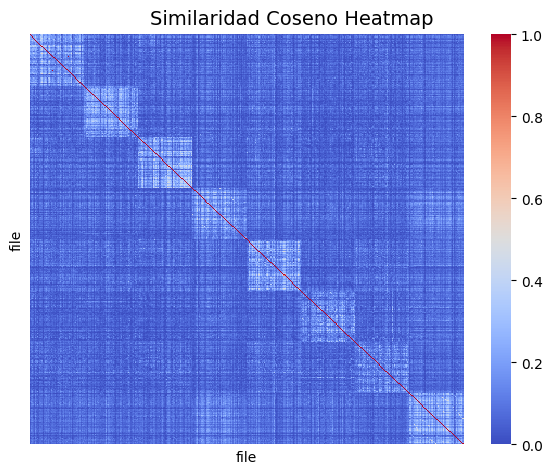

In [15]:
f, ax = plt.subplots(figsize=(7, 5))
hm = sns.heatmap(sim_df, annot=False, ax=ax, cmap="coolwarm",fmt='.2f',
            xticklabels = False, yticklabels = False)
f.subplots_adjust(top=0.93)
t= f.suptitle('Similaridad Coseno Heatmap', fontsize=14)

### Visualización (PCA) y Clustering

In [16]:
from sklearn import cluster
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import plotly.express as px

In [ ]:
pca = PCA(n_components=5)
pca.fit(bow)
# proyectar datos
proj = pd.DataFrame(pca.transform(bow),columns = ['pc1','pc2','pc3','pc4','pc5'])

pca_bow = pd.DataFrame({'pc1': proj['pc1'], 'pc2': proj['pc2'], 'tipo': t_data['categoria']})
pca_bow

In [ ]:
proj

In [ ]:
pca_bow

In [21]:
# Grafica interactiva
fig = px.scatter(pca_bow, x='pc1', y='pc2', hover_data=['tipo'], color = 'tipo')
fig.update_layout(
    autosize=False,
    width=600,
    height=600,
)
fig.show()

In [19]:
pca = PCA(n_components=5)
pca.fit(cos_sim)
# proyectar datos
proj = pd.DataFrame(pca.transform(cos_sim),columns = ['pc1','pc2','pc3','pc4','pc5'])

pca_bow = pd.DataFrame({'pc1': proj['pc1'], 'pc2': proj['pc2'], 'tipo': t_data['categoria']})

In [20]:
# Grafica interactiva
fig = px.scatter(pca_bow, x='pc1', y='pc2', hover_data=['tipo'], color = 'tipo')
fig.update_layout(
    autosize=False,
    width=600,
    height=600,
)
fig.show()

#### $k-$ means.

Ahora veamos qué obtenemos si tratamos de identificar `k` clústers en los datos. ¿Podremos identificar los tópicos?

In [ ]:
# K-MEANS en los componentes principales de la matriz de similaridad
k = 8
k_means = cluster.MiniBatchKMeans(n_clusters=k, random_state=10, n_init='auto')
k_means.fit(proj)
#cl_pred = pd.DataFrame(k_means.predict(proj)).astype('category')
cl_pred = pd.Series(k_means.predict(proj), dtype="category")
#cl_pred = k_means.predict(proj)
cl_pred

0      3
1      3
2      3
3      3
4      3
      ..
395    2
396    2
397    7
398    2
399    7
Length: 400, dtype: category
Categories (8, int64): [0, 1, 2, 3, 4, 5, 6, 7]

In [ ]:
# grafica interactiva
pca_bow = pd.DataFrame({'pc1': proj['pc1'], 'pc2': proj['pc2'], 'tipo': t_data['file'],
                       'clus':cl_pred})

fig = px.scatter(pca_bow, x='pc1', y='pc2', hover_data=['tipo'], color = 'clus')
fig.update_layout(
    autosize=False,
    width=600,
    height=600,
)
fig.show()

### Recuperación de información (Information retrieval)

In [ ]:
## QUERY
#q = 'Los saltos con breves reflexiones, de lectura ágil y sin problemas de comprensión de una historia que se cuenta hacia atrás y en peequeñas dosis. Al libro le sobran páginas, divagaciones que no aportan demasiado, sin embargo me gustó bastante'
q = 'una lavadora muy buena para mi ropa'
q_prep = [preprocesador.preprocesa(q)]
q_bow = vectorizer.transform(q_prep)
sim_q = cosine_similarity(bow,q_bow.toarray())
ind_sort = np.argsort(sim_q,0)[::-1] ## sort con reverse mediante slicing
# top 5
cerca_ind = np.ndarray.flatten(ind_sort[:5])
ff = [t_data['file'][i] for i in cerca_ind]
ff


['lavadoras_yes_4_21.txt',
 'lavadoras_no_1_5.txt',
 'lavadoras_yes_5_16.txt',
 'lavadoras_yes_5_7.txt',
 'lavadoras_no_1_9.txt']

In [ ]:
f_txt = open(dir_data+ff[0], 'r', encoding='latin-1').read()
f_txt

'en general estoy envcantada con la lavadora pero sí que es verdad que en más de una ocasión he descubierto que la ropa tenía rotos después de lavarla. yo creía que se debía al contacto entre la propia ropa (cremalleras...) pero como he podido leer aquí no soy a la única que le ocurre y además con esta misma lavadora.\n\nya digo que por lo demás me parece una lavadora muy buena y lo de los rotos me habrá pasado tres o cuatro veces en dos años. eso sí, cuando te pasa y te fastidia algún pantalón a alguna ropa que aprecias te fastidia bastante.  '

## BOW extensiones. TF-IDF (Salton and Buckley, 1988).

Una extensión a la frecuencia de términos es una versión __pesada__ de los mismos.

El más usado es Term Frequency - Inverse Document Frequency (TF-IDF).

\begin{itemize}
\item Frecuencia de términos: $tf_{t,d} = \text{count}(t,d)$, o también: $tf = log(\text{count}(t,d)+1)$
\item Frecuencia de documentos: $df_t = \text{count}(d:t\in d)$
\item Frecuencia de documentos inversa: $idf_t = \log\frac{N}{1+df_t}$
\end{itemize}

Entonces
\begin{align*}
\text{TF-IDF}: tf_{t,d} \times idf_t
\end{align*}

Existen varias implementaciones (Keras, SKlearn, NLTK) que consideran diferentes esquemas de pesado de la matriz BOW, incluyendo TF-IDF.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(lowercase=False, ngram_range= (1,1), max_features=10000, min_df=.02)
#vectorizer = TfidfVectorizer(lowercase=True, ngram_range= (2,2))
X = vectorizer.fit_transform(corpus)
tfidf = X.toarray()
tfidf_df = pd.DataFrame(tfidf,columns=vectorizer.get_feature_names_out())
#tfidf_df.describe()
tfidf_df[55:65]

,abajo,abierto,abre,abrir,absolutamente,absoluto,absurda,aburrida,acaba,acabado,...,vuelven,vuelvo,web,will,windows,xp,york,you,your,zona
55,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
56,0.0,0.0,0.105531,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
57,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.060404
58,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
59,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
60,0.0,0.0,0.000000,0.000000,0.082280,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
61,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.121589,0.104483,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
62,0.0,0.0,0.000000,0.101472,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
63,0.0,0.0,0.000000,0.000000,0.148767,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
64,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [ ]:
cos_sim = cosine_similarity(tfidf, tfidf)
sim_df = pd.DataFrame(cos_sim)
sim_df.columns = t_data['file']
sim_df.index = t_data['file']

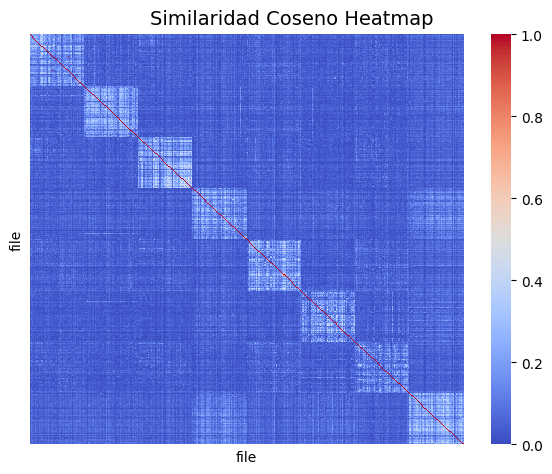

In [ ]:
f, ax = plt.subplots(figsize=(7, 5))
hm = sns.heatmap(sim_df, annot=False, ax=ax, cmap="coolwarm",fmt='.2f',
            xticklabels = False, yticklabels = False)
f.subplots_adjust(top=0.93)
t= f.suptitle('Similaridad Coseno Heatmap', fontsize=14)

### Visualización (PCA) y Clustering

Veamos una visualización usando primero los componentes de TF-IDF

In [ ]:
pca = PCA(n_components=5)
pca.fit(tfidf)
# proyectar datos
proj = pd.DataFrame(pca.transform(tfidf),columns = ['pc1','pc2','pc3','pc4','pc5'])

pca_tfidf = pd.DataFrame({'pc1': proj['pc1'], 'pc2': proj['pc2'], 'tipo': t_data['categoria']})

In [ ]:
# Grafica interactiva
fig = px.scatter(pca_tfidf, x='pc1', y='pc2', hover_data=['tipo'], color = 'tipo')
fig.update_layout(autosize=False, width=600, height=600)
fig.show()

Ahora, usando los componentes de la matriz de similaridad

In [ ]:
pca = PCA(n_components=5)
pca.fit(cos_sim)
# proyectar datos
proj = pd.DataFrame(pca.transform(cos_sim),columns = ['pc1','pc2','pc3','pc4','pc5'])

pca_bow = pd.DataFrame({'pc1': proj['pc1'], 'pc2': proj['pc2'], 'tipo': t_data['categoria']})

# Grafica interactiva
fig = px.scatter(pca_bow, x='pc1', y='pc2', hover_data=['tipo'], color = 'tipo')
fig.update_layout(autosize=False, width=600, height=600)
fig.show()

#### $k-$ means.

Ahora veamos qué obtenemos si tratamos de identificar `k` clústers en los datos. ¿Podremos identificar los tópicos?

Primero vemos la clusterización usando los componentes de la matriz TF-IDF

In [ ]:
pca = PCA(n_components=5)
pca.fit(tfidf)
# proyectar datos
proj = pd.DataFrame(pca.transform(tfidf),columns = ['pc1','pc2','pc3','pc4','pc5'])

# K-MEANS en los componentes principales de la matriz de similaridad
k = 8
k_means = cluster.MiniBatchKMeans(n_clusters=k, random_state=10, n_init='auto')
k_means.fit(proj)
#cl_pred = pd.DataFrame(k_means.predict(proj)).astype('category')
cl_pred = pd.Series(k_means.predict(proj), dtype="category")
#cl_pred = k_means.predict(proj)
cl_pred

0      6
1      6
2      6
3      6
4      6
      ..
395    2
396    2
397    2
398    2
399    2
Length: 400, dtype: category
Categories (8, int64): [0, 1, 2, 3, 4, 5, 6, 7]

In [ ]:
# grafica interactiva
pca_tfidf = pd.DataFrame({'pc1': proj['pc1'], 'pc2': proj['pc2'], 'tipo': t_data['file'],'clus':cl_pred})

fig = px.scatter(pca_tfidf, x='pc1', y='pc2', hover_data=['tipo'], color = 'clus')
fig.update_layout(autosize=False, width=600, height=600)
fig.show()

Ahora, usando los componentes de la matriz de similaridades

In [ ]:
pca = PCA(n_components=5)
pca.fit(cos_sim)
# proyectar datos
proj = pd.DataFrame(pca.transform(cos_sim),columns = ['pc1','pc2','pc3','pc4','pc5'])

# K-MEANS en los componentes principales de la matriz de similaridad
k = 8
k_means = cluster.MiniBatchKMeans(n_clusters=k, random_state=10, n_init='auto')
k_means.fit(proj)
#cl_pred = pd.DataFrame(k_means.predict(proj)).astype('category')
cl_pred = pd.Series(k_means.predict(proj), dtype="category")
#cl_pred = k_means.predict(proj)
cl_pred

0      5
1      5
2      5
3      5
4      5
      ..
395    2
396    2
397    2
398    2
399    2
Length: 400, dtype: category
Categories (8, int64): [0, 1, 2, 3, 4, 5, 6, 7]

In [ ]:
# grafica interactiva
pca_tfidf = pd.DataFrame({'pc1': proj['pc1'], 'pc2': proj['pc2'], 'tipo': t_data['file'], 'clus':cl_pred})

fig = px.scatter(pca_tfidf, x='pc1', y='pc2', hover_data=['tipo'], color = 'clus')
fig.update_layout(autosize=False, width=600, height=600)
fig.show()

Si bien los modelos basados en representaciones tipo BOW son muy útiles para ciertas tareas y ciertos corpus de textos, para otros no es la mejor opción.

Básicamente, los problemas de BOW y sus extensiones son
- Altamente dimensional
- Sparse

## Word embeddings y semántica distribucional

El esquema que hemos usado para análisis de textos:

<center>
<img src="figs/textos3.png" height="20%" width="25%"/>
<center>


Las representaciones vectoriales que veremos en ésta parte del curso, se construyen para que nos den más información relacionada con las palabras __y su uso__ en el lenguaje.

- Semántica: el estudio del significado de los signos lingüisticos. Examina las relaciones entre las palabras y lo que representan.

- El significado de una palabra está dado por las palabras que aparecen cercanas frecuentemente: "*You shall know a word by the company it keeps*" (J. R. Firth 1957: 11)

- La semántica vectorial nos ofrece una manera cuantitativa para representar diversas cualidades útiles de las palabras (significado, similaridad, asociaciones, etcétera):


In [ ]:
from nltk.book import text1, text4
print('Corpus: ',text4.name,'\n')

text4.concordance('city',lines=10) #president, city

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.


LookupError: ignored

__Word embeddings__:

Representaciones vectoriales densas de una longitud predefinida, donde podemos inferir propiedades semánticas de las palabras, tales como su significado, mediante la semántica distribucional.

Para obtenerlos, usamos un __modelo de lenguaje__.

### Modelos de lenguaje

Los modelos que asignan __probabilidades__ a __secuencias de palabras__ se les llaman modelos de lenguaje.

Introducir probabilidades nos permite inferir características semánticas de las palabras, tales como el **significado**, al observar la distribución de las palabras alrededor de alguna de interés.

Modelos de lenguaje "everywhere"...

<center>
<img src="figs/chat.png" height="30%" width="30%"/>
<center>


Sea $w_1,w_2,\ldots,w_T$ una secuencia de palabras, donde  $w \in V$ (Vocabulario).

Un modelo de lenguaje obtiene probabilidades de palabras

\begin{align*}
    P(w_t)= P(w_t|w_1^{t-1})   
\end{align*}

en la secuencia.


Por ejemplo, si $V=\lbrace ..., perro, gato, suegro, refrigerador, ...\rbrace$

P(perro|cuando llego a casa, tengo que dar de comer al)

P(gato | cuando llego a casa, tengo que dar de comer al)

P(suegro|cuando llego a casa, tengo que dar de comer al)

P(estufa|cuando llego a casa, tengo que dar de comer al)      


También, podemos calcular la probabilidad de obtener una secuencia de $n$ palabras:

\begin{align*}
P(w_1^n)=\displaystyle \prod_{t=1}^n P(w_t|w_1^{t-1}).
\end{align*}

Esto se vuelve muy complicado a medida que la longitud de la secuencia aumenta.


Una simplificación es el modelo $n-$gram:

\begin{align*}
P(w_t|w_1^{t-1}) \approx P\left(w_t|w_{t-N+1}^{t-1}\right)
\end{align*}

donde definimos un contexto basado solo en las $N$ palabras previas.

Diferentes modelos de lenguaje se basan en enfoques particulares para calcular ésas probabilidades.

### Modelo neuronal de lenguaje (NNLM)

<center>
<img src="figs/bengio03.png" height="60%" width="60%"/>
<center>

En este paper seminal, Bengio et al. introducen el uso de Redes Neuronales Feed Forward para secuencias de textos.

¿Cómo funciona?  Versión simplificada...

<center>
<img src="figs/emb4.png" height="60%" width="60%"/>
<center>

(Jurafsky & Martin, 2019)

Si queremos construir los embeddings, llegamos al modelo de Bengio:

<center>
<img src="figs/emb5.png" height="60%" width="60%"/>
<center>

(Jurafsky & Martin, 2019)

La propuesta de Bengio et al.

- Asociar un vector en $\mathbb{R}^d$ a cada palabra del vocabulario
- Expresar la probabilidad conjunta de secuencias de palabras en términos de los vectores de las palabras en la secuencia.
- Aprender al mismo tiempo, la representación vectorial de las palabras y los parámetros de las probabilidades (máxima verosimilitud)


Dado un vocabulario $V$, la probabilidad conjunta se modela (y se aprende) mediante $P(w_t|w_1^{t-1})=f(w_t,\ldots,w_{t-n+1})$. Consta de dos partes:
1. Un mapeo $E(i)$ para cualquier elemento $i$ de $V$ a un vector $E(i)=\mathbf{e} \in \mathbb{R}^d$. Este mapeo es representado por la matriz $\mathbf{E}_{d \times |V|}$ (en el paper de Bengio se representa por $C_{d \times |V|}$).
2. Una función de probabilidad obtenida mediante una función $g(\cdot)$:
    \begin{align*}
      f(i, w_{t-1},\ldots,w_{t-n+1})=g(i,E(w_{t-1}),\ldots,E(w_{t-n+1})).
    \end{align*}
    Observa que $\mathbf{E}$ se __comparte__ en todas las palabras del contexto.

Paso Forward:

1. Capa de proyección: dados los índices de las $n$ palabras del contexto, construye los vectores one-hot $\mathbf{x}_i$ correspondientes y su proyección (mapeo o embedding) $\mathbf{e}_i = \mathbf{E}\mathbf{x}_i$. La capa de proyección es la concatenación de los embeddings de las palabras del contexto:
    \begin{align*}
      \mathbf{e} = (\mathbf{e}_1,\mathbf{e}_2,\ldots,\mathbf{e}_n)'
    \end{align*}
2. Capa oculta:
    \begin{align*}
      \mathbf{h}=\tanh (\mathbf{W}\mathbf{e}+\mathbf{b})
    \end{align*}
3. Capa de salida:

    \begin{align*}
      \begin{array}{rcl}
        \mathbf{z} & = & \mathbf{U}\mathbf{h} \\        
        \mathbf{y} & = & \text{softmax}(\mathbf{z})        
      \end{array}
    \end{align*}
  


Paso Backward (backpropagation):

Se realiza iterativamente usando gradiente estocástico:
  \begin{align*}
    \boldsymbol{\theta}=\boldsymbol{\theta}+\gamma\displaystyle
    \frac{\partial \log P(w_t|w_{t-1},\ldots,w_{t-n+1})}{\partial \boldsymbol{\theta}}
  \end{align*}
después de observar la palabra $t$ del corpus de entrenamiento.

Los detalles los omitimos. Si tienes curiosidad, me preguntas...

En el ajuste, $\boldsymbol{\theta}$ representa todos los parámetros:

Sean $d$ la dimensión del embedding de las palabras, $h$ el número de unidades ocultas y $n$ la ventana de contexto. Los parámetros de la NNLM son entonces

\begin{align*}
    \boldsymbol{\theta}=(\mathbf{c},\mathbf{b},\mathbf{V},\mathbf{U},\mathbf{W},\mathbf{E}),  
\end{align*}
donde
  
$\mathbf{E}\in \mathbb{R}^{d\times |V|}$, $\mathbf{W}\in \mathbb{R}^{h\times n\cdot d}$, $\mathbf{U}\in \mathbb{R}^{|V|\times h}$, $\mathbf{V}\in \mathbb{R}^{|V|\times n\cdot d}$, $\mathbf{b}\in \mathbb{R}^{h}$, $\mathbf{c}\in \mathbb{R}^{|V|}$
  
Nota: $\mathbf{V}$ y $\mathbf{c}$ son opcionales, ya que son parámetros de conexiones de los embeddings a la capa de salida (detalles en el paper de Bengio).

### word2vec (T. Mikolov et al., 2013)

Word embeddings derivados del NNLM de Bengio

<center>
<img src="figs/w2v-mikolov1.png" height="45%" width="45%"/>
<center>

T. Mikolov et al., 2013 (b). Extensiones del modelo

<img src="figs/w2v-mikolov2.png" height="40%" width="40%"/>


- Una de las representaciones vectoriales mas usadas
- Nos proporciona representaciones densas (entradas diferentes de cero) y con vectores cortos ($\mathbb{R}^{100}$ a $\mathbb{R}^{300}$, generalmente).
- Usa los pesos de una red neuronal como los embeddings. Este clasificador representa una medida cuantitativa de la Probabilidad de que una palabra $w_c$ aparezca __cerca__ de una palabra objetivo $w_t$.
- Aporta principalmente, ventajas computacionales
- Presenta dos algoritmos: CBOW (Continuous Bag-of-Words Model) y Skip-Gram


<center>
<img src="figs/mikolov_cbow_skipgram.png" height="45%" width="45%"/>
<center>

Mikolov et. al., 2013

CBOW

<center>
<img src="figs/w2v-1.png" height="30%" width="30%"/>
<center>

Xin Rong, 2016.

CBOW:

- One-hot encoding en la capa de entrada
- Usa activación lineal en la capa oculta
- Dos embeddings (pesos): el de la palabra objetivo y el del contexto (input-hidden y hidden-output).

Skip-Gram

<img src="figs/w2v-2.png" height="30%" width="30%"/>
Xin Rong, 2016.

- En la capa de salida, se calculan $n$ distribuciones multinomiales con softmax, donde $n$ es el número de palabras del contexto

### Ejemplo: word2vec

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

Cargo un modelo pre-entrenado con el spanish billion words corpus
Cristian Cardellino: Spanish Billion Words Corpus and Embeddings (March 2016), https://crscardellino.github.io/SBWCE/

Es un corpus sin anotar de aproximadamente 1.5 billion words, compilado de diferentes corpus y recursos de la web, tales como: Spanish portion of SenSem. Spanish portion of the Ancora Corpus. Tibidabo Treebank and IULA Spanish LSP Treebank.

El tamaño del embedding (vectores para cada palabra) es de 300.

In [ ]:
## NO EJECUTAR, hasta que hayas bajado los pesos (embeddings)
from gensim.models.keyedvectors import KeyedVectors
wordvectors_file_vec = '/home/victor/cursos/optativas_general/data/word_embeddings_SBWC/fasttext-sbwc.vec'
size_w = 100000
#wordvectors = KeyedVectors.load_word2vec_format(wordvectors_file_vec)
# tambien puedes usar ésta línea de código para simplificar los embeddings limitando el número
wordvectors = KeyedVectors.load_word2vec_format(wordvectors_file_vec, limit=size_w)

In [ ]:
sns.set_style('ticks')
def plot_sim_words(model,word,n=10):
    close_words=model.similar_by_word(word,topn=n)
    arr = np.empty((0,300), dtype='f')
    word_labels = [word]

    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)


    pca = PCA(n_components=2).fit(arr)
    Y = pca.transform(arr)

    xx = Y[:, 0]
    yy = Y[:, 1]

    plt.scatter(xx,yy)
    for label, x, y in zip(word_labels, xx, yy):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(xx.min()+0.00005, xx.max()+0.00005)
    plt.ylim(yy.min()+0.00005, yy.max()+0.00005)
    plt.show()

#### Buscar palabras similares semánticamente (según el contexto)

In [ ]:
## palabras similares a 'word'
#word='laptop'
word='soldados'
wordvectors.similar_by_word(word,topn=15)

[('milicianos', 0.7438867688179016),
 ('combatientes', 0.7340446710586548),
 ('desarmados', 0.7138782739639282),
 ('tropas', 0.7069873809814453),
 ('reclutas', 0.7016940712928772),
 ('batallones', 0.6937234401702881),
 ('ejército', 0.6760452389717102),
 ('alistados', 0.6723908185958862),
 ('desertores', 0.6700753569602966),
 ('ejércitos', 0.6650692224502563),
 ('regimientos', 0.6559537053108215),
 ('conscriptos', 0.6558620929718018),
 ('acantonados', 0.6552616357803345),
 ('destacamentos', 0.6537191867828369),
 ('soldado', 0.6462199091911316)]

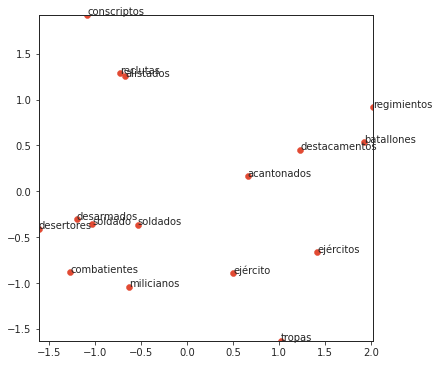

In [ ]:
## visualizar con PCA
plt.figure(figsize=(6,6))
plot_sim_words(wordvectors,word,15)

#### Aritmética de embeddings para capturar analogías:
`hombre es a rey como mujer es a ......`

king - man = queen - woman

queen $\approx$ king - man + woman

In [ ]:
wordvectors.most_similar(positive=['rey','mujer'],negative=['hombre'])

[('reina', 0.6306586265563965),
 ('infanta', 0.5454354882240295),
 ('princesa', 0.5346059203147888),
 ('berenguela', 0.5296739339828491),
 ('consorte', 0.5245280265808105),
 ('regente', 0.5192065834999084),
 ('monarca', 0.5124676823616028),
 ('emperatriz', 0.49612754583358765),
 ('majestad', 0.4850054681301117),
 ('hermanastra', 0.47889792919158936)]

`hombre es a casa como mujer es a ....`

casa - hombre = X - mujer

"X" $\approx$ casa - hombre + mujer

In [ ]:
wordvectors.most_similar_cosmul(positive=['casa','mujer'],negative=['hombre'])

[('casita', 0.8205015063285828),
 ('abuela', 0.8178001046180725),
 ('solariega', 0.8130972385406494),
 ('mansión', 0.8062207102775574),
 ('casona', 0.8048673272132874),
 ('suegra', 0.8032931089401245),
 ('tía', 0.7976457476615906),
 ('asistenta', 0.7951297163963318),
 ('familia', 0.7912790179252625),
 ('suegros', 0.7909038066864014)]

`mujer es a casa como hombre es a ....`

"X" $\approx$ casa-mujer + hombre

In [ ]:
wordvectors.most_similar_cosmul(positive=['casa','hombre'],negative=['mujer'])

[('mansión', 0.891708254814148),
 ('dueño', 0.8717513680458069),
 ('guarida', 0.8657176494598389),
 ('apartamento', 0.8623498678207397),
 ('caserón', 0.8612393736839294),
 ('casita', 0.8607402443885803),
 ('casas', 0.8567700982093811),
 ('patio', 0.8532143831253052),
 ('inquilino', 0.8518964052200317),
 ('morador', 0.8518121242523193)]

Italia es a Roma como Francia es a...

Francia - Italia = X - Roma

In [ ]:
wordvectors.most_similar_cosmul(positive=['francia', 'roma'],negative=['italia'])

[('parís', 0.9015266299247742),
 ('marsella', 0.8670936226844788),
 ('aviñón', 0.8584529757499695),
 ('burdeos', 0.8472610712051392),
 ('montpellier', 0.8434250950813293),
 ('lyon', 0.8415651917457581),
 ('versalles', 0.8248647451400757),
 ('rennes', 0.8240140080451965),
 ('avignon', 0.8227346539497375),
 ('poitiers', 0.8194710612297058)]

México es a tacos como Italia es a...

Italia - Mexico = X - tacos

In [ ]:
wordvectors.most_similar_cosmul(positive=['italia', 'tacos'],negative=['mexico'])

[('mozzarella', 0.9207503199577332),
 ('espaguetis', 0.9031434059143066),
 ('macarrones', 0.8967775702476501),
 ('lombardía', 0.8738992214202881),
 ('parmesano', 0.8671034574508667),
 ('italianos', 0.8592511415481567),
 ('pizzas', 0.8558807373046875),
 ('verdura', 0.8521963357925415),
 ('salami', 0.8462202548980713),
 ('embutido', 0.8454034328460693)]

### Clasificación mediante document embeddings

Usamos los mismos datos de opinión

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import my_functions
from my_functions import *

t_data = pd.read_csv('data/spanish_reviews/reviews_text_caract.csv', header=0)
t_data

,file,categoria,sentimiento
0,coches_no_1_11.txt,coches,no
1,coches_no_1_13.txt,coches,no
2,coches_no_1_15.txt,coches,no
3,coches_no_1_18.txt,coches,no
4,coches_no_1_19.txt,coches,no
...,...,...,...
395,peliculas_yes_5_23.txt,peliculas,yes
396,peliculas_yes_5_4.txt,peliculas,yes
397,peliculas_yes_5_5.txt,peliculas,yes
398,peliculas_yes_5_7.txt,peliculas,yes


In [ ]:
dir_data = 'data/spanish_reviews/all_files/'
# leer y preprocesar textos
preprocesador = preprocesaTexto(idioma='es', _tokeniza=False, _muestraCambios=False, _quitarAcentos=True,
                                _remueveStop=True, _stemming=False)

files_txt = dir_data+t_data['file']
files_txt = files_txt.tolist()

corpus = []
for f in files_txt:
    file = open(f, 'r', encoding='latin-1')
    txt = file.read()
    txt_prep = preprocesador.preprocesa(txt)
    corpus.append(txt_prep)

y1 = t_data['categoria'].astype('category').cat.codes
y2 = t_data['sentimiento'].astype('category').cat.codes

In [ ]:
def frase_a_vec(frase, modelo_wv):
    N = 0
    acc = np.zeros(modelo_wv.vector_size)
    for palabra in frase:
        if palabra in wordvectors.key_to_index:
            acc += modelo_wv[palabra]
            N += 1
    return acc if N==0 else acc/N

def sentencias_a_vec(frases, modelo_wv):
    vectores = np.zeros((len(frases), modelo_wv.vector_size))
    for (i, frase) in enumerate(frases):
        vectores[i,:] = frase_a_vec(frase, modelo_wv)
    return vectores


In [ ]:
docs_vec = np.zeros((len(corpus), wordvectors.vector_size))

for (i, txt) in enumerate(corpus):
    tokens = word_tokenize(txt)
    docs_vec[i,:] = frase_a_vec(tokens, wordvectors)

docs_vec.shape

(400, 300)

In [ ]:
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler
import plotly.express as px

X = StandardScaler().fit_transform(docs_vec)
pca = PCA(n_components=5)
docs_pca = pca.fit_transform(X)
proj = pd.DataFrame(docs_pca,columns = ['pc1','pc2','pc3','pc4','pc5'])

proj_docs = pd.DataFrame({'pc1': proj['pc1'], 'pc2': proj['pc2'], 'pc3': proj['pc3'], 'topico': t_data['categoria'],
                       'sentimiento':t_data['sentimiento']})

In [ ]:
fig = px.scatter(proj_docs, x='pc1', y='pc2', hover_data=['sentimiento'], color = 'topico')
fig.update_layout(autosize=False, width=600, height=600)
fig.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC # Support vector classifier
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(docs_vec, y2, test_size=0.2, random_state=42)

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.83      0.69        36
           1       0.79      0.52      0.63        44

    accuracy                           0.66        80
   macro avg       0.69      0.68      0.66        80
weighted avg       0.70      0.66      0.66        80



In [ ]:
plt.style.use('default')
cm = metrics.confusion_matrix(y_test,y_pred)
disp_cm = metrics.ConfusionMatrixDisplay(cm, display_labels=np.arange(len(svm.classes_)))
fig, ax = plt.subplots(figsize=(5,5))
ax.set_title('Matriz de confusion. Sin normalizar',{'fontsize':10})

disp_cm.plot(ax=ax, colorbar=False)
# Adding custom colorbar
cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(disp_cm.im_,  cax=cax);

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(penalty='l2', C=15)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.78      0.71        36
           1       0.78      0.66      0.72        44

    accuracy                           0.71        80
   macro avg       0.72      0.72      0.71        80
weighted avg       0.72      0.71      0.71        80



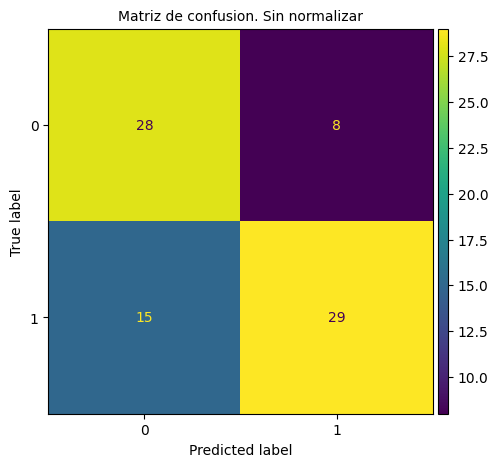

In [ ]:
plt.style.use('default')
cm = metrics.confusion_matrix(y_test,y_pred)
disp_cm = metrics.ConfusionMatrixDisplay(cm, display_labels=np.arange(len(clf.classes_)))
fig, ax = plt.subplots(figsize=(5,5))
ax.set_title('Matriz de confusion. Sin normalizar',{'fontsize':10})

disp_cm.plot(ax=ax, colorbar=False)
# Adding custom colorbar
cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(disp_cm.im_,  cax=cax);


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(docs_vec, y1, test_size=0.2, random_state=42)

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        11
           3       0.88      1.00      0.93         7
           4       0.89      1.00      0.94         8
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         5
           7       1.00      0.92      0.96        13

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80



In [ ]:
plt.style.use('default')
cm = metrics.confusion_matrix(y_test,y_pred)
disp_cm = metrics.ConfusionMatrixDisplay(cm, display_labels=np.arange(len(svm.classes_)))
fig, ax = plt.subplots(figsize=(5,5))
ax.set_title('Matriz de confusion. Sin normalizar',{'fontsize':10})

disp_cm.plot(ax=ax, colorbar=False)
# Adding custom colorbar
cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(disp_cm.im_,  cax=cax);

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(penalty='l2', C=15, multi_class='ovr')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        11
           3       0.88      1.00      0.93         7
           4       0.89      1.00      0.94         8
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         5
           7       1.00      0.92      0.96        13

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80



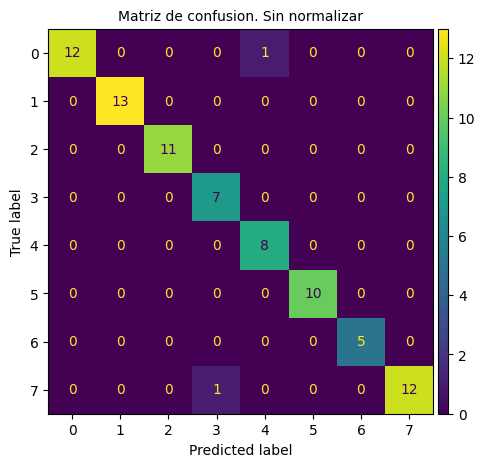

In [ ]:
plt.style.use('default')
cm = metrics.confusion_matrix(y_test,y_pred)
disp_cm = metrics.ConfusionMatrixDisplay(cm, display_labels=np.arange(len(clf.classes_)))
fig, ax = plt.subplots(figsize=(5,5))
ax.set_title('Matriz de confusion. Sin normalizar',{'fontsize':10})

disp_cm.plot(ax=ax, colorbar=False)
# Adding custom colorbar
cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(disp_cm.im_,  cax=cax);

### Otros embeddings relacionados

- fastText: Enriching Word Vectors with Subword Information. Bojanowski et al. 2017.

    Skip-Gram (word2vec) a nivel de subpalabras: `<where>,  -->   <wh, whe, her, ere, re> `



- GloVe: Global Vectors for Word Representation. Pennington et al., 2014.

      Global matrix factorization + Local context window.

